In [ ]:
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/content/gdrive/My Drive/School/Summer 2022-2023/INFO 608/Twitter Survey (Responses).csv"

df = pd.read_csv(file_path, sep=",", encoding='cp1252')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
question_ids = ["Q" + str(x+1) for x in range(15)]
df.columns = ["Timestamp"] + question_ids
twitter_blue = "#26a7de"
twitter_shades = ["#8CFFFF", "#59DAFF", "#26a7de", "#0074AB", "#004178"]
df.shape

(106, 16)

# Methodology

## Survey Implementation

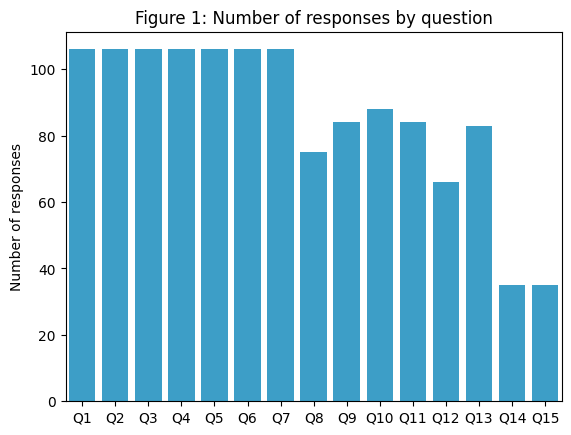

In [ ]:
response_counts = list(df.apply(lambda x: x.notnull().sum()))

ax = sns.barplot(x=question_ids, y=response_counts[1:],
                 color=twitter_blue)

ax.set(xlabel='', ylabel='Number of responses',
       title="Figure 1: Number of responses by question");

# Analysis

## Demographic Data

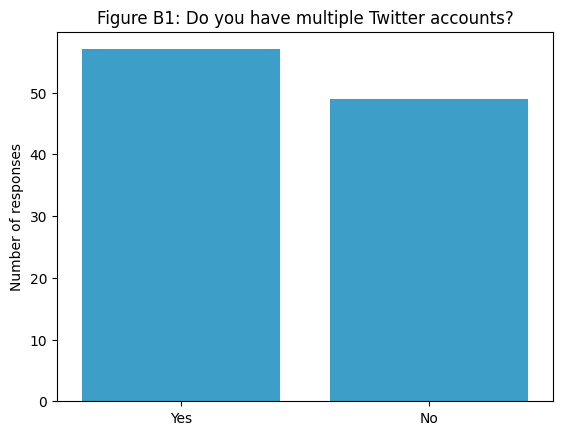

In [ ]:
ax = sns.countplot(x=df["Q2"], color=twitter_blue)

ax.set(xlabel='', ylabel='Number of responses',
       title="Figure B1: Do you have multiple Twitter accounts?");

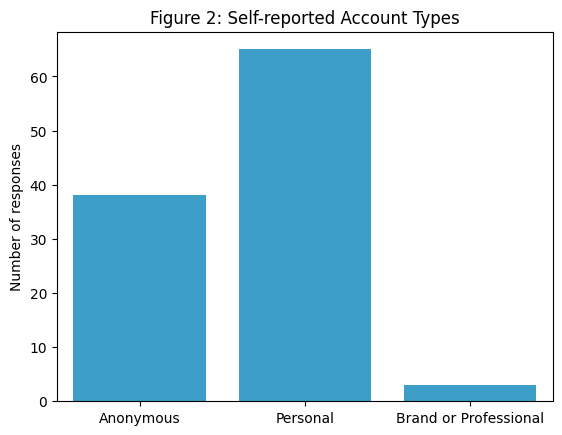

In [ ]:
q3_plot = [x[:-8] for x in df["Q3"]]

ax = sns.countplot(x=q3_plot, color=twitter_blue)

ax.set(xlabel='', ylabel='Number of responses',
       title="Figure 2: Self-reported Account Types");

In [ ]:
df = df[df["Q3"] != "Brand or Professional Account"]
q3_plot = [x[:-8] for x in df["Q3"]]
df.shape

(103, 16)

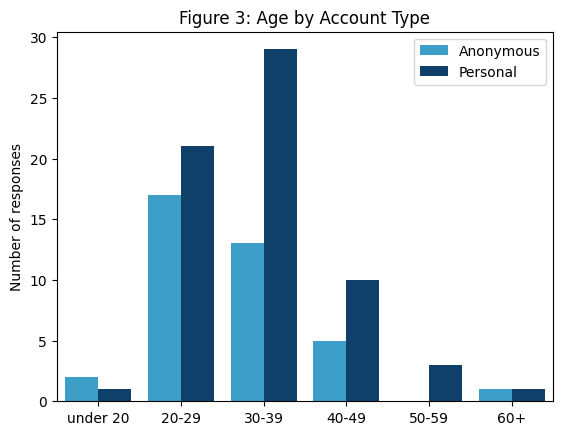

In [ ]:
order = ["under 20", "20-29", "30-39", "40-49", "50-59", "60+"]
q1_plot = pd.Categorical(df["Q1"], ordered=True, categories=order)

ax = sns.countplot(x=q1_plot, hue=q3_plot,
                   palette = [twitter_shades[2], twitter_shades[4]])

ax.set(xlabel='', ylabel='Number of responses',
       title="Figure 3: Age by Account Type");

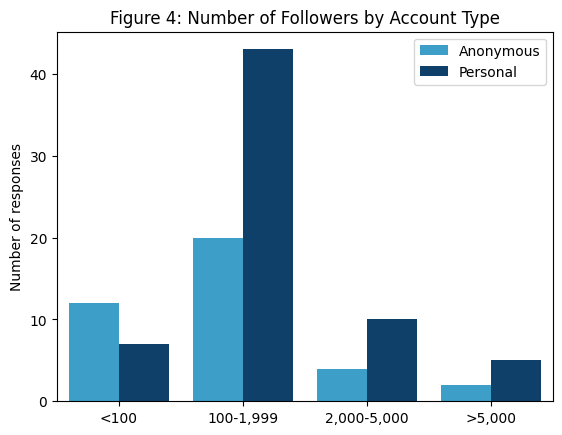

In [ ]:
q4_plot = ["<100" if x == "less than 100" else
            "100-1,999" if x == "between 100 and 1,999" else
            "2,000-5,000" if x == "between 2,000 and 5,000" else
            ">5,000" for x in df["Q4"]]

order = ["<100", "100-1,999", "2,000-5,000", ">5,000"]
q4_plot = pd.Categorical(q4_plot, ordered=True, categories=order)

ax = sns.countplot(x=q4_plot, hue=q3_plot,
                   palette = [twitter_shades[2], twitter_shades[4]])

ax.set(xlabel='', ylabel='Number of responses',
       title="Figure 4: Number of Followers by Account Type");

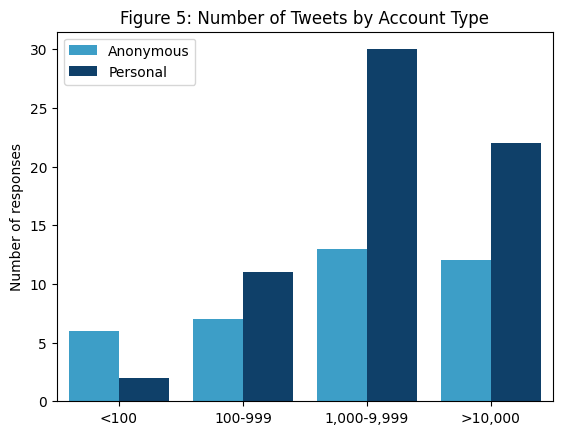

In [ ]:
q5_plot = ["<100" if x == "less than 100" else
            "100-999" if x == "between 100 and 999" else
            "1,000-9,999" if x == "between 1,000 and 9,999" else
            ">10,000" for x in df["Q5"]]

order = ["<100", "100-999", "1,000-9,999", ">10,000"]
q5_plot = pd.Categorical(q5_plot, ordered=True, categories=order)

ax = sns.countplot(x=q5_plot, hue=q3_plot,
                   palette = [twitter_shades[2], twitter_shades[4]])

ax.set(xlabel='', ylabel='Number of responses',
       title="Figure 5: Number of Tweets by Account Type");

## Structured Data

### Q6

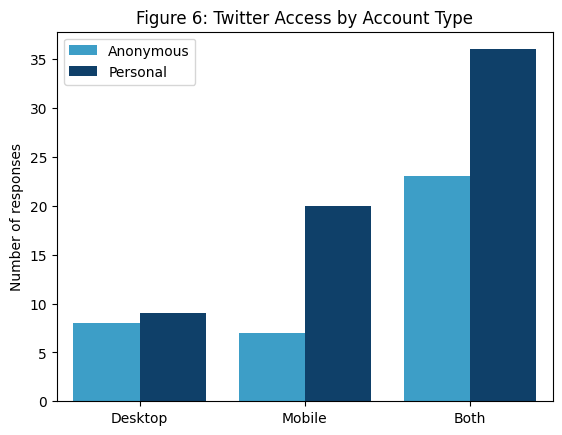

In [ ]:
q6_plot = ["Desktop" if x == "Desktop" else
            "Mobile" if x == "Mobile Application" else
            "Both" for x in df["Q6"]]

order = ["Desktop", "Mobile", "Both"]
q6_plot = pd.Categorical(q6_plot, ordered=True, categories=order)

ax = sns.countplot(x=q6_plot, hue=q3_plot,
                   palette = [twitter_shades[2], twitter_shades[4]])

ax.set(xlabel='', ylabel='Number of responses',
       title="Figure 6: Twitter Access by Account Type");

### Q7

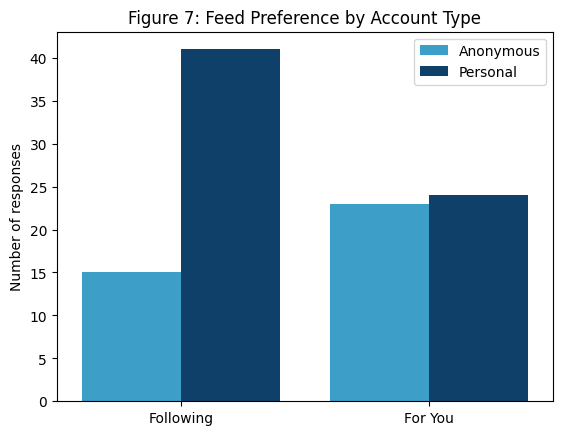

In [ ]:
ax = sns.countplot(x=df["Q7"], hue=q3_plot,
                   palette = [twitter_shades[2], twitter_shades[4]])

ax.set(xlabel='', ylabel='Number of responses',
       title="Figure 7: Feed Preference by Account Type");

### Q9

In [ ]:
q9_lists = [["Bookmarks"] if x == "Bookmarks" else
           ["Bookmarks", "Communities"] if x == "Bookmarks, Communities" else
           ["Bookmarks", "Communities", "Spaces"] if x == "Bookmarks, Communities, Spaces" else
           ["Bookmarks", "Lists"] if x == "Bookmarks, Lists" else
           ["Bookmarks", "Lists", "Spaces"] if x == "Bookmarks, Lists, Spaces" else
           ["Bookmarks", "Spaces"] if x == "Bookmarks, Spaces" else
           ["Lists"] if x == "Lists" else
           ["Spaces"] if x == "Spaces" else
           ["None"] for x in df["Q9"]]

q9_counts = [len(x) if "None" not in x else 0 for x in q9_lists]

print("Mean number of features:", np.mean(q9_counts))
pd.Index(q9_counts).value_counts()

Mean number of features: 1.1553398058252426


1    48
2    28
0    22
3     5
dtype: int64

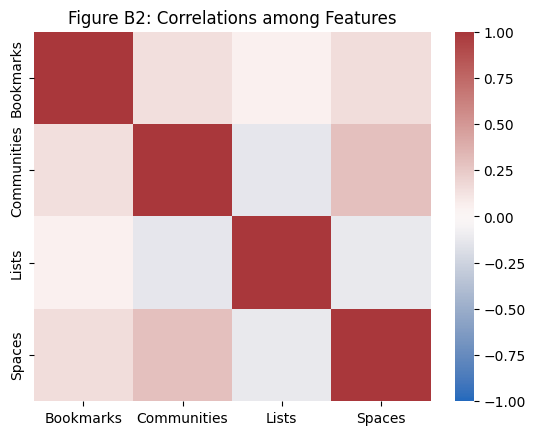

In [ ]:
q9_plot_df = pd.DataFrame({
    "Bookmarks": [1 if "Bookmarks" in x else 0 for x in q9_lists],
    "Communities": [1 if "Communities" in x else 0 for x in q9_lists],
    "Lists": [1 if "Lists" in x else 0 for x in q9_lists],
    "Spaces": [1 if "Spaces" in x else 0 for x in q9_lists],
    "None": [1 if "None" in x else 0 for x in q9_lists],
    "Group": [q3_plot[i] for i, x in enumerate(q3_plot)]
})

q9_corr = q9_plot_df[["Bookmarks", "Communities", "Lists", "Spaces"]].corr()

ax = sns.heatmap(q9_corr, vmin=-1.0, vmax=1.0,
                 cmap=sns.color_palette("vlag", as_cmap=True))

ax.set(title="Figure B2: Correlations among Features");

<ipython-input-14-a339a14a1e39>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Variable', y='Value', hue='Group', data=q9_plot,


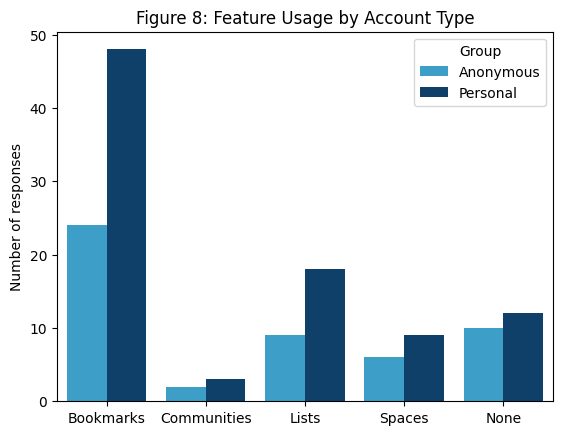

In [ ]:
q9_plot = q9_plot_df.melt(id_vars='Group').rename(columns=str.title)

ax = sns.barplot(x='Variable', y='Value', hue='Group', data=q9_plot,
                 estimator=sum, ci=None,
                 palette = [twitter_shades[2], twitter_shades[4]])

ax.set(xlabel='', ylabel='Number of responses',
       title="Figure 8: Feature Usage by Account Type");

### Q13

In [ ]:
q13_lists = [["Bluesky"] if x == "Bluesky" else
            ["Mastodon"] if x == "Mastodon" else
            ["Threads"] if x == "Threads" else
            ["Bluesky", "Threads"] if x == "Bluesky, Threads" else
            ["Mastodon", "Bluesky", "Threads"] if x == "Mastodon, Bluesky, Threads" else
            ["Mastodon", "Bluesky"] if x == "Mastodon, Bluesky" else
            ["Mastodon", "Threads"] if x == "Mastodon, Threads" else
            ["Mastodon", "Other"] if x == "Mastodon, tumblr, spoutible " else
            ["None"] if (x == "None" or x == "none" or x != x) else
            ["Other"] for x in df["Q13"]]

q13_counts = [len(x) if "None" not in x else 0 for x in q13_lists]

print("Mean number of competitors:", np.mean(q13_counts))
pd.Index(q13_counts).value_counts()

Mean number of competitors: 1.145631067961165


1    45
0    26
2    23
3     9
dtype: int64

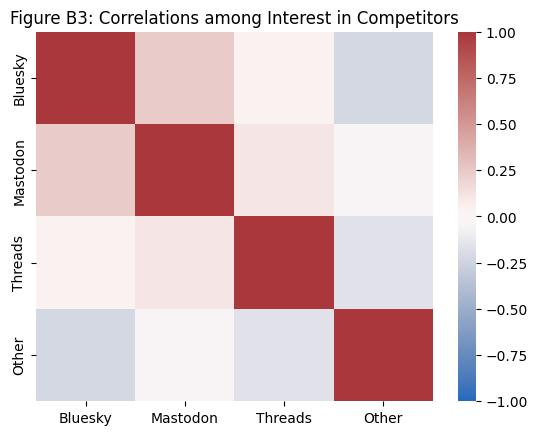

In [ ]:
q13_plot_df = pd.DataFrame({
    "Bluesky": [1 if "Bluesky" in x else 0 for x in q13_lists],
    "Mastodon": [1 if "Mastodon" in x else 0 for x in q13_lists],
    "Threads": [1 if "Threads" in x else 0 for x in q13_lists],
    "Other": [1 if "Other" in x else 0 for x in q13_lists],
    "None": [1 if "None" in x else 0 for x in q13_lists],
    "Group": [q3_plot[i] for i, x in enumerate(q3_plot)]
})

q13_corr = q13_plot_df[["Bluesky", "Mastodon", "Threads", "Other"]].corr()

ax = sns.heatmap(q13_corr, vmin=-1.0, vmax=1.0,
                 cmap=sns.color_palette("vlag", as_cmap=True))

ax.set(title="Figure B3: Correlations among Interest in Competitors");

<ipython-input-17-c6cdb72f3691>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Variable', y='Value', hue='Group', data=q13_plot,


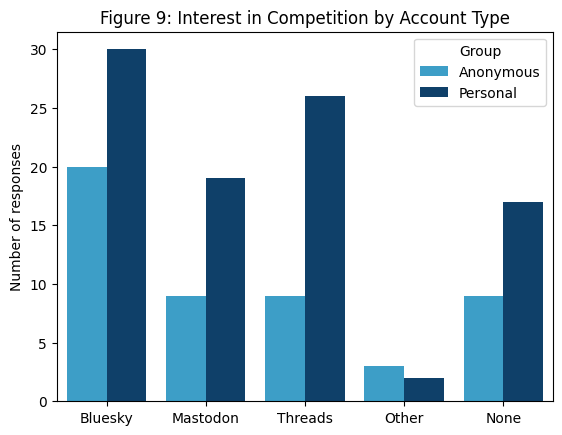

In [ ]:
q13_plot = q13_plot_df.melt(id_vars='Group').rename(columns=str.title)

ax = sns.barplot(x='Variable', y='Value', hue='Group', data=q13_plot,
                 estimator=sum, ci=None,
                 palette = [twitter_shades[2], twitter_shades[4]])

ax.set(xlabel='', ylabel='Number of responses',
       title="Figure 9: Interest in Competition by Account Type");

### Q14

In [ ]:
q14_lists = [["Bluesky"] if x == "Bluesky" else
            ["Mastodon"] if x == "Mastodon" else
            ["Threads"] if x == "Threads" or x == "Threads but not often" else
            ["Bluesky", "Threads"] if x == "Bluesky, Threads" else
            ["Mastodon", "Bluesky", "Threads"] if x == "Mastodon, Bluesky, Threads" else
            ["Mastodon", "Bluesky"] if x == "Mastodon, Bluesky" else
            ["Mastodon", "Other"] if x == "Mastodon, tumblr, spoutible " else
            ["None"] if (x == "None" or x == "none" or x != x) else
            ["Other"] for x in df["Q14"]]

q14_counts = [len(x) if "None" not in x else 0 for x in q14_lists]

print("Mean number of competitors:", np.mean(q14_counts))
pd.Index(q14_counts).value_counts()

Mean number of competitors: 0.3786407766990291


0    72
1    25
2     4
3     2
dtype: int64

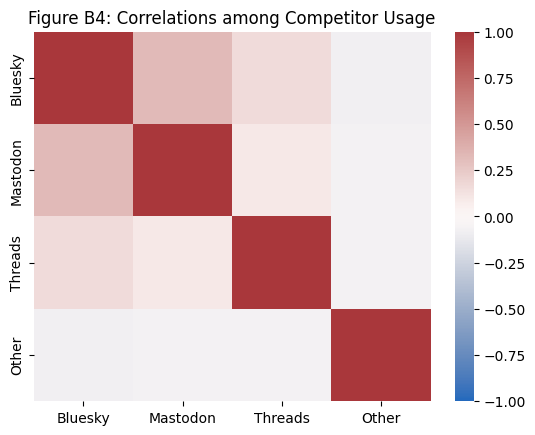

In [ ]:
q14_plot_df = pd.DataFrame({
    "Bluesky": [1 if "Bluesky" in x else 0 for x in q14_lists],
    "Mastodon": [1 if "Mastodon" in x else 0 for x in q14_lists],
    "Threads": [1 if "Threads" in x else 0 for x in q14_lists],
    "Other": [1 if "Other" in x else 0 for x in q14_lists],
    "None": [1 if "None" in x else 0 for x in q14_lists],
    "Group": [q3_plot[i] for i, x in enumerate(q3_plot)]
})

q14_corr = q14_plot_df[["Bluesky", "Mastodon", "Threads", "Other"]].corr()

ax = sns.heatmap(q14_corr, vmin=-1.0, vmax=1.0,
                 cmap=sns.color_palette("vlag", as_cmap=True))

ax.set(title="Figure B4: Correlations among Competitor Usage");

<ipython-input-20-b1f46b7fd373>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Variable', y='Value', hue='Group', data=q14_plot,


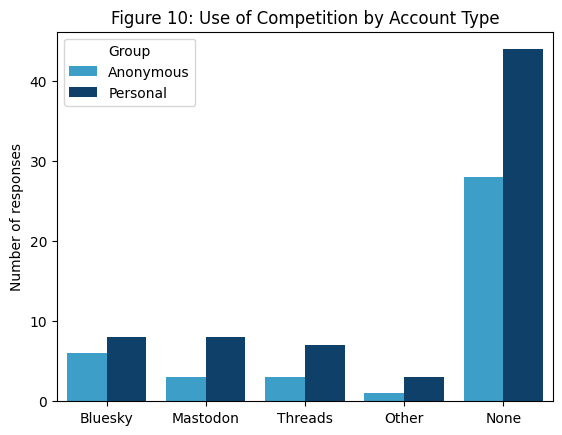

In [ ]:
q14_plot = q14_plot_df.melt(id_vars='Group').rename(columns=str.title)

ax = sns.barplot(x='Variable', y='Value', hue='Group', data=q14_plot,
                 estimator=sum, ci=None,
                 palette = [twitter_shades[2], twitter_shades[4]])

ax.set(xlabel='', ylabel='Number of responses',
       title="Figure 10: Use of Competition by Account Type");